In [234]:
# Import dependencies
import praw
from psaw import PushshiftAPI
import pandas as pd
import datetime
from time import sleep
from config import client_id, client_secret, user_agent

In [181]:
# Set up API credentials
reddit = praw.Reddit(client_id = client_id,
                     client_secret = client_secret,
                     user_agent = user_agent)
api = PushshiftAPI()

In [182]:
# Search dates
posted_after = int(datetime.datetime(2020, 11, 1).timestamp())
posted_before = int(datetime.datetime(2020, 11, 30).timestamp())

# Query cryptocurrency subreddit
query1 = api.search_comments(subreddit='cryptocurrency',
                             q="bitcoin|btc",
                             after=posted_after,
                             before=posted_before,
                             limit=10000)

# Query bitcoin subreddit
query2 = api.search_comments(subreddit='bitcoin',
                             q="bitcoin|btc",
                             after=posted_after,
                             before=posted_before,
                             limit=10000)

# Query btc subreddit
query3 = api.search_comments(subreddit='btc',
                             q="bitcoin|btc",
                             after=posted_after,
                             before=posted_before,
                             limit=10000)

In [183]:
# Setup list and add query1 results to it
submissions = list()

for element in query1:
    submissions.append(element.d_)
print(len(submissions))

1000


In [184]:
# Add query2 results
for element in query2:
    submissions.append(element.d_)
print(len(submissions))

2000


In [185]:
# Add query3 results
for element in query3:
    submissions.append(element.d_)
print(len(submissions))

3000


In [193]:
# Convert to dataframe
df = pd.DataFrame(submissions)

In [194]:
# Keep only the needed columns
df = df[['id', 'score', 'subreddit', 'body', 'created_utc']]

In [195]:
df.head()

,id,score,subreddit,body,created_utc
0,ge4omw2,1,CryptoCurrency,I know how you feel. Bitcoin turned me into a ...,1606722416
1,ge4ogy4,1,CryptoCurrency,They work in different ways depending on the c...,1606722266
2,ge4ocqr,1,CryptoCurrency,[**Raoul Pal**@RaoulGMI](https://twitter.com/R...,1606722162
3,ge4nyor,1,CryptoCurrency,Every comment you’ve made so far is getting ma...,1606721809
4,ge4njbw,0,CryptoCurrency,You know why I won’t use Nano? Same reason why...,1606721420


In [196]:
# Convert to datetime and sort by it
df['datetime'] = df['created_utc'].map(lambda t: datetime.datetime.fromtimestamp(t))
df = df.drop('created_utc', axis=1)
df = df.sort_values(by='datetime')
df

,id,score,subreddit,body,datetime
2999,gdgpvjs,1,btc,It seems you're being downvoted by bitcoin cas...,2020-11-24 09:42:11
2998,gdgpzbm,1,btc,"Assuming its an honest question, a LN wallet i...",2020-11-24 09:42:59
2997,gdgq5te,1,btc,Yup! Losses deduct from your income. https://c...,2020-11-24 09:44:20
2996,gdgqvq3,2,btc,Then you'll be able to dump your bags and buy ...,2020-11-24 09:49:46
2995,gdgrg69,1,btc,How is the fact that I bought a gift card make...,2020-11-24 09:54:03
...,...,...,...,...,...
2002,ge4os6b,1,btc,That's BTC,2020-11-29 23:49:12
2001,ge4oycz,1,btc,All the developers work on core tho. The peopl...,2020-11-29 23:51:51
1001,ge4ozku,1,Bitcoin,Can you tell me how does Monero provides anony...,2020-11-29 23:52:23
2000,ge4p5ab,1,btc,You know that satoshi and a few other early mi...,2020-11-29 23:54:50


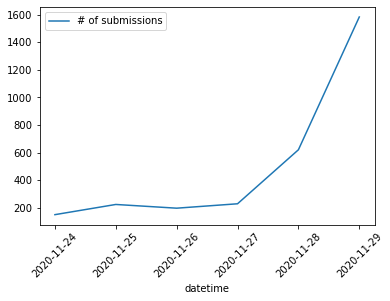

In [197]:
# Display # of results by date
df.groupby(by=df.datetime.dt.date).count().plot(y='id', rot=45, label='# of submissions')

# Grab per day results

In [232]:
# Getting date ranges per day
import datetime
start_date = datetime.date(2018, 1, 1)
end_date = datetime.date(2020, 9, 14)
delta = datetime.timedelta(days=1)

stopper = start_date

while start_date <= end_date:
    stopper += delta
    print(start_date, "to", stopper)
    start_date += delta

2018-01-01 to 2018-01-02
2018-01-02 to 2018-01-03
2018-01-03 to 2018-01-04
2018-01-04 to 2018-01-05
2018-01-05 to 2018-01-06
2018-01-06 to 2018-01-07
2018-01-07 to 2018-01-08
2018-01-08 to 2018-01-09
2018-01-09 to 2018-01-10
2018-01-10 to 2018-01-11
2018-01-11 to 2018-01-12
2018-01-12 to 2018-01-13
2018-01-13 to 2018-01-14
2018-01-14 to 2018-01-15
2018-01-15 to 2018-01-16
2018-01-16 to 2018-01-17
2018-01-17 to 2018-01-18
2018-01-18 to 2018-01-19
2018-01-19 to 2018-01-20
2018-01-20 to 2018-01-21
2018-01-21 to 2018-01-22
2018-01-22 to 2018-01-23
2018-01-23 to 2018-01-24
2018-01-24 to 2018-01-25
2018-01-25 to 2018-01-26
2018-01-26 to 2018-01-27
2018-01-27 to 2018-01-28
2018-01-28 to 2018-01-29
2018-01-29 to 2018-01-30
2018-01-30 to 2018-01-31
2018-01-31 to 2018-02-01
2018-02-01 to 2018-02-02
2018-02-02 to 2018-02-03
2018-02-03 to 2018-02-04
2018-02-04 to 2018-02-05
2018-02-05 to 2018-02-06
2018-02-06 to 2018-02-07
2018-02-07 to 2018-02-08
2018-02-08 to 2018-02-09
2018-02-09 to 2018-02-10


2019-07-17 to 2019-07-18
2019-07-18 to 2019-07-19
2019-07-19 to 2019-07-20
2019-07-20 to 2019-07-21
2019-07-21 to 2019-07-22
2019-07-22 to 2019-07-23
2019-07-23 to 2019-07-24
2019-07-24 to 2019-07-25
2019-07-25 to 2019-07-26
2019-07-26 to 2019-07-27
2019-07-27 to 2019-07-28
2019-07-28 to 2019-07-29
2019-07-29 to 2019-07-30
2019-07-30 to 2019-07-31
2019-07-31 to 2019-08-01
2019-08-01 to 2019-08-02
2019-08-02 to 2019-08-03
2019-08-03 to 2019-08-04
2019-08-04 to 2019-08-05
2019-08-05 to 2019-08-06
2019-08-06 to 2019-08-07
2019-08-07 to 2019-08-08
2019-08-08 to 2019-08-09
2019-08-09 to 2019-08-10
2019-08-10 to 2019-08-11
2019-08-11 to 2019-08-12
2019-08-12 to 2019-08-13
2019-08-13 to 2019-08-14
2019-08-14 to 2019-08-15
2019-08-15 to 2019-08-16
2019-08-16 to 2019-08-17
2019-08-17 to 2019-08-18
2019-08-18 to 2019-08-19
2019-08-19 to 2019-08-20
2019-08-20 to 2019-08-21
2019-08-21 to 2019-08-22
2019-08-22 to 2019-08-23
2019-08-23 to 2019-08-24
2019-08-24 to 2019-08-25
2019-08-25 to 2019-08-26


In [224]:
# Getting date ranges per day and converting to timestamp
import datetime
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2020, 1, 4)
delta = datetime.timedelta(days=1)

stopper = start_date

while start_date <= end_date:
    stopper += delta
    
    start = int(start_date.timestamp())
    end = int(stopper.timestamp())
    print(start, "to", end)
    start_date += delta

1577865600 to 1577952000
1577952000 to 1578038400
1578038400 to 1578124800
1578124800 to 1578211200


In [237]:
# Get 1 year worth of data for each day
# This takes around 30 minutes to run

submissions = list()
start_date = datetime.datetime(2019, 9, 14)
end_date = datetime.datetime(2020, 9, 14)
delta = datetime.timedelta(days=1)
stopper = start_date

while start_date <= end_date:
    stopper += delta
    
    # Convert dates to timestamp
    start = int(start_date.timestamp())
    end = int(stopper.timestamp())
    
    # Query api for day at start
    query1 = api.search_comments(subreddit='cryptocurrency',
                                 q="bitcoin|btc",
                                 after=start,
                                 before=end,
                                 limit=100)
    # Query bitcoin subreddit
    query2 = api.search_comments(subreddit='bitcoin',
                                 q="bitcoin|btc",
                                 after=posted_after,
                                 before=posted_before,
                                 limit=100)
    
    # Query btc subreddit
    query3 = api.search_comments(subreddit='btc',
                                 q="bitcoin|btc",
                                 after=posted_after,
                                 before=posted_before,
                                 limit=100)
    
    # Get 100 query1 results
    for element in query1:
        submissions.append(element.d_)
    
    # Prevent API timeouts
    sleep(1)
    
    # Get 100 query2 results
    for element in query2:
        submissions.append(element.d_)
        
    sleep(1)
    
    # Get 100 query3 results
    for element in query3:
        submissions.append(element.d_)
        
    sleep(1)
    
    start_date += delta
    
    print("Current date tracker: ", stopper) 

print(len(submissions))

Current date tracker:  2019-09-15 00:00:00
Current date tracker:  2019-09-16 00:00:00
Current date tracker:  2019-09-17 00:00:00
Current date tracker:  2019-09-18 00:00:00
Current date tracker:  2019-09-19 00:00:00
Current date tracker:  2019-09-20 00:00:00
Current date tracker:  2019-09-21 00:00:00
Current date tracker:  2019-09-22 00:00:00
Current date tracker:  2019-09-23 00:00:00
Current date tracker:  2019-09-24 00:00:00
Current date tracker:  2019-09-25 00:00:00
Current date tracker:  2019-09-26 00:00:00
Current date tracker:  2019-09-27 00:00:00
Current date tracker:  2019-09-28 00:00:00
Current date tracker:  2019-09-29 00:00:00
Current date tracker:  2019-09-30 00:00:00
Current date tracker:  2019-10-01 00:00:00
Current date tracker:  2019-10-02 00:00:00
Current date tracker:  2019-10-03 00:00:00
Current date tracker:  2019-10-04 00:00:00
Current date tracker:  2019-10-05 00:00:00
Current date tracker:  2019-10-06 00:00:00
Current date tracker:  2019-10-07 00:00:00
Current dat

/Users/adamweber/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/psaw/PushshiftAPI.py:244: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


Current date tracker:  2019-11-28 00:00:00
Current date tracker:  2019-11-29 00:00:00
Current date tracker:  2019-11-30 00:00:00
Current date tracker:  2019-12-01 00:00:00
Current date tracker:  2019-12-02 00:00:00
Current date tracker:  2019-12-03 00:00:00
Current date tracker:  2019-12-04 00:00:00
Current date tracker:  2019-12-05 00:00:00
Current date tracker:  2019-12-06 00:00:00
Current date tracker:  2019-12-07 00:00:00
Current date tracker:  2019-12-08 00:00:00
Current date tracker:  2019-12-09 00:00:00
Current date tracker:  2019-12-10 00:00:00
Current date tracker:  2019-12-11 00:00:00
Current date tracker:  2019-12-12 00:00:00
Current date tracker:  2019-12-13 00:00:00
Current date tracker:  2019-12-14 00:00:00
Current date tracker:  2019-12-15 00:00:00
Current date tracker:  2019-12-16 00:00:00
Current date tracker:  2019-12-17 00:00:00
Current date tracker:  2019-12-18 00:00:00
Current date tracker:  2019-12-19 00:00:00
Current date tracker:  2019-12-20 00:00:00
Current dat

Current date tracker:  2020-06-06 00:00:00
Current date tracker:  2020-06-07 00:00:00
Current date tracker:  2020-06-08 00:00:00
Current date tracker:  2020-06-09 00:00:00
Current date tracker:  2020-06-10 00:00:00
Current date tracker:  2020-06-11 00:00:00
Current date tracker:  2020-06-12 00:00:00
Current date tracker:  2020-06-13 00:00:00
Current date tracker:  2020-06-14 00:00:00
Current date tracker:  2020-06-15 00:00:00
Current date tracker:  2020-06-16 00:00:00
Current date tracker:  2020-06-17 00:00:00
Current date tracker:  2020-06-18 00:00:00
Current date tracker:  2020-06-19 00:00:00
Current date tracker:  2020-06-20 00:00:00
Current date tracker:  2020-06-21 00:00:00
Current date tracker:  2020-06-22 00:00:00
Current date tracker:  2020-06-23 00:00:00
Current date tracker:  2020-06-24 00:00:00
Current date tracker:  2020-06-25 00:00:00
Current date tracker:  2020-06-26 00:00:00
Current date tracker:  2020-06-27 00:00:00
Current date tracker:  2020-06-28 00:00:00
Current dat

In [269]:
# Convert to dataframe
df = pd.DataFrame(submissions)
# Keep only the needed columns
df = df[['id', 'score', 'subreddit', 'body', 'created_utc']]
# Convert to datetime and sort by it
df['datetime'] = df['created_utc'].map(lambda t: datetime.datetime.fromtimestamp(t))
df = df.drop('created_utc', axis=1)
df = df.sort_values(by='datetime')
df

,id,score,subreddit,body,datetime
99,f08lrou,1,CryptoCurrency,xt1818 &lt;---This guy has alts and btc.,2019-09-14 10:48:50
98,f08lu7l,1,CryptoCurrency,All of the above and all other commodity coins...,2019-09-14 10:49:22
97,f08lxzg,1,CryptoCurrency,Like Bitcoin its general purpose money that th...,2019-09-14 10:50:14
96,f08mh1t,1,CryptoCurrency,There will never be another alt season. It's t...,2019-09-14 10:54:51
95,f08peyl,1,CryptoCurrency,&gt; circumstances liek what? Holding the vouc...,2019-09-14 11:21:20
...,...,...,...,...,...
65107,ge4pguc,1,Bitcoin,Definitely not the best thing about bitcoin!,2020-11-29 23:59:54
20188,ge4pguc,1,Bitcoin,Definitely not the best thing about bitcoin!,2020-11-29 23:59:54
75607,ge4pguc,1,Bitcoin,Definitely not the best thing about bitcoin!,2020-11-29 23:59:54
73807,ge4pguc,1,Bitcoin,Definitely not the best thing about bitcoin!,2020-11-29 23:59:54


In [270]:
# Lots of duplicates. Most seem to be spam/bots
duplicateRowsDF = df[df.duplicated(['body'])]
len(duplicateRowsDF)

76066

In [271]:
# Removing duplicates
df = df.drop_duplicates(subset='body', keep="first")
df

,id,score,subreddit,body,datetime
99,f08lrou,1,CryptoCurrency,xt1818 &lt;---This guy has alts and btc.,2019-09-14 10:48:50
98,f08lu7l,1,CryptoCurrency,All of the above and all other commodity coins...,2019-09-14 10:49:22
97,f08lxzg,1,CryptoCurrency,Like Bitcoin its general purpose money that th...,2019-09-14 10:50:14
96,f08mh1t,1,CryptoCurrency,There will never be another alt season. It's t...,2019-09-14 10:54:51
95,f08peyl,1,CryptoCurrency,&gt; circumstances liek what? Holding the vouc...,2019-09-14 11:21:20
...,...,...,...,...,...
79309,ge4os6b,1,btc,That's BTC,2020-11-29 23:49:12
45161,ge4oycz,1,btc,All the developers work on core tho. The peopl...,2020-11-29 23:51:51
59456,ge4ozku,1,Bitcoin,Can you tell me how does Monero provides anony...,2020-11-29 23:52:23
6200,ge4p5ab,1,btc,You know that satoshi and a few other early mi...,2020-11-29 23:54:50


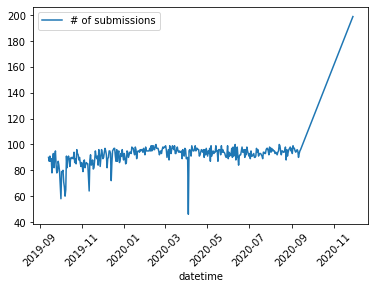

In [273]:
# Display # of results by date
df.groupby(by=df.datetime.dt.date).count().plot(y='id', rot=45, label='# of submissions')

In [274]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/adamweber/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [275]:
# Get sentiment scores for df
analyzer = SentimentIntensityAnalyzer()

df['neg'] = df['body'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
df['neu'] = df['body'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
df['pos'] = df['body'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
df['compound'] = df['body'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
df

/Users/adamweber/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/adamweber/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/adamweber/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,id,score,subreddit,body,datetime,neg,neu,pos,compound
99,f08lrou,1,CryptoCurrency,xt1818 &lt;---This guy has alts and btc.,2019-09-14 10:48:50,0.000,1.000,0.000,0.0000
98,f08lu7l,1,CryptoCurrency,All of the above and all other commodity coins...,2019-09-14 10:49:22,0.000,0.926,0.074,0.4019
97,f08lxzg,1,CryptoCurrency,Like Bitcoin its general purpose money that th...,2019-09-14 10:50:14,0.189,0.731,0.080,-0.3400
96,f08mh1t,1,CryptoCurrency,There will never be another alt season. It's t...,2019-09-14 10:54:51,0.000,0.917,0.083,0.2500
95,f08peyl,1,CryptoCurrency,&gt; circumstances liek what? Holding the vouc...,2019-09-14 11:21:20,0.126,0.789,0.085,-0.7869
...,...,...,...,...,...,...,...,...,...
79309,ge4os6b,1,btc,That's BTC,2020-11-29 23:49:12,0.000,1.000,0.000,0.0000
45161,ge4oycz,1,btc,All the developers work on core tho. The peopl...,2020-11-29 23:51:51,0.078,0.685,0.237,0.9153
59456,ge4ozku,1,Bitcoin,Can you tell me how does Monero provides anony...,2020-11-29 23:52:23,0.038,0.836,0.126,0.6416
6200,ge4p5ab,1,btc,You know that satoshi and a few other early mi...,2020-11-29 23:54:50,0.000,1.000,0.000,0.0000


In [276]:
# View overall subreddit scores
df.groupby('subreddit')['compound'].describe()

,count,mean,std,min,25%,50%,75%,max
subreddit,,,,,,,,
Bitcoin,100.0,0.230247,0.466472,-0.9193,0.00000,0.05795,0.664975,0.9983
CryptoCurrency,33742.0,0.160193,0.540423,-0.9973,-0.22630,0.14950,0.636900,0.9994
btc,99.0,0.063399,0.567252,-0.9614,-0.37095,0.05160,0.512300,0.9856


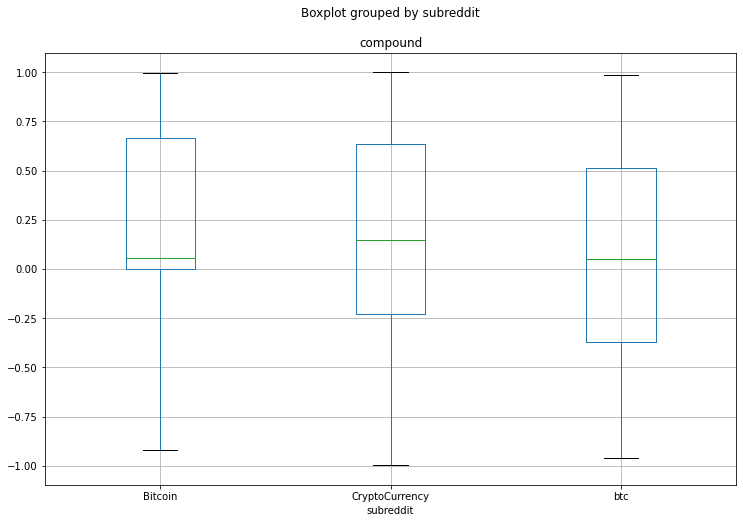

In [278]:
# Display above scores as a boxplot
df.boxplot(by='subreddit', column='compound', figsize=(12,8))

In [291]:
df.index = pd.to_datetime(df['datetime'])
df['rolling'] = df['compound'].rolling('6h').mean()

/Users/adamweber/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [292]:
df.head()

,id,score,subreddit,body,datetime,neg,neu,pos,compound,rolling
datetime,,,,,,,,,,
2019-09-14 10:48:50,f08lrou,1,CryptoCurrency,xt1818 &lt;---This guy has alts and btc.,2019-09-14 10:48:50,0.000,1.000,0.000,0.0000,0.000000
2019-09-14 10:49:22,f08lu7l,1,CryptoCurrency,All of the above and all other commodity coins...,2019-09-14 10:49:22,0.000,0.926,0.074,0.4019,0.200950
2019-09-14 10:50:14,f08lxzg,1,CryptoCurrency,Like Bitcoin its general purpose money that th...,2019-09-14 10:50:14,0.189,0.731,0.080,-0.3400,0.020633
2019-09-14 10:54:51,f08mh1t,1,CryptoCurrency,There will never be another alt season. It's t...,2019-09-14 10:54:51,0.000,0.917,0.083,0.2500,0.077975
2019-09-14 11:21:20,f08peyl,1,CryptoCurrency,&gt; circumstances liek what? Holding the vouc...,2019-09-14 11:21:20,0.126,0.789,0.085,-0.7869,-0.095000


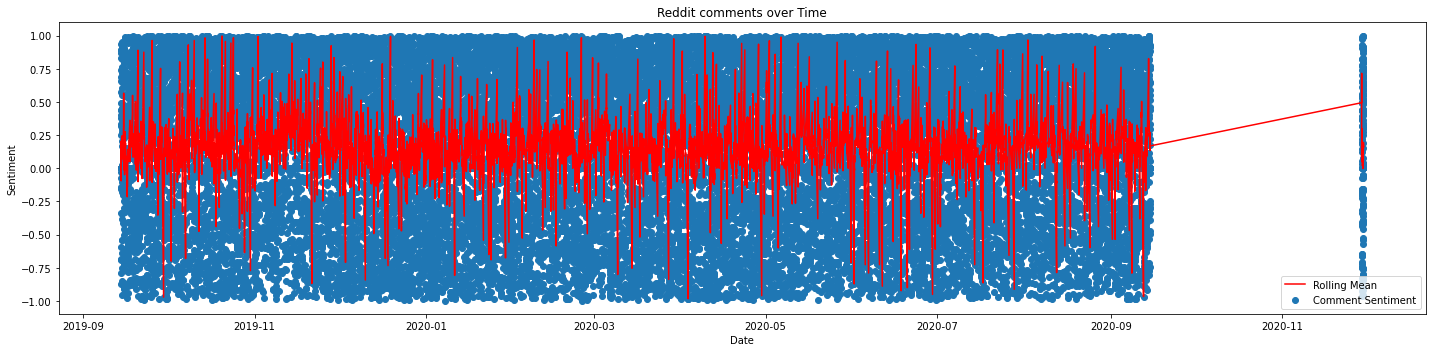

In [294]:
# View sentiment across entire dataset
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.scatter(df['datetime'],df['compound'], label='Comment Sentiment')
ax.plot(df['datetime'],df['rolling'], color ='r', label='Rolling Mean')
ax.set(title='Reddit comments over Time', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')
fig.tight_layout()
plt.show()

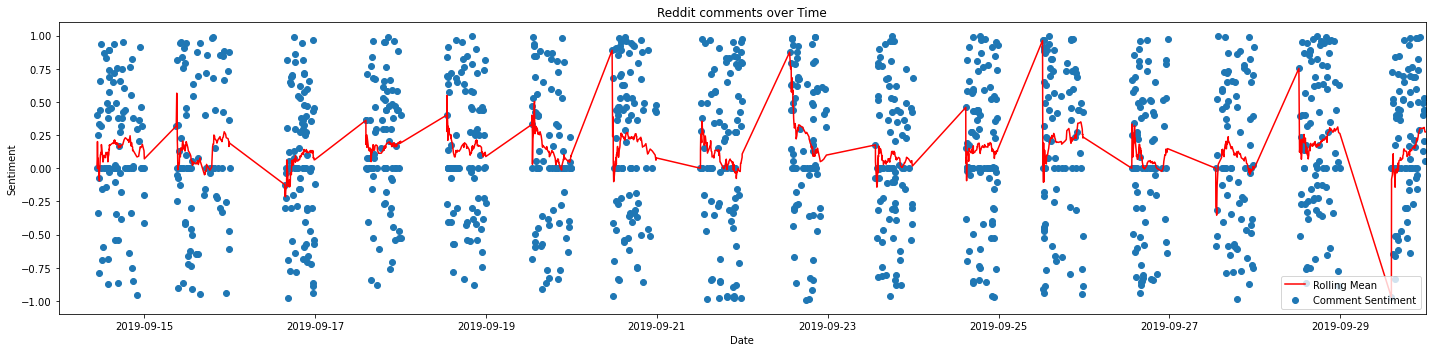

In [295]:
# View small sample of sentiment
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.scatter(df['datetime'],df['compound'], label='Comment Sentiment')
ax.plot(df['datetime'],df['rolling'], color ='r', label='Rolling Mean')
ax.set_xlim([dt.date(2019,9,14),dt.date(2019,9,30)])
ax.set(title='Reddit comments over Time', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')
fig.tight_layout()
plt.show()